In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

def load_bin(filepath: str):
    """Loads the complex-valued int16 data from a given binary file.

    Parameters:
    filepath (str): Path to the input file, which is handled as interleaved
    16-bit integer little-endian data.

    Returns:
    array_like: Complex-valued vector.

   """
    interleaved_data = np.fromfile(filepath, dtype='<i2')
    output = interleaved_data.astype(np.float64).view(np.complex128)
    return output

# Use the function to load data from a binary file
data1 = load_bin("C:/Users/singh/Downloads/DJI_inspire_2_5G_1of2.bin")
data2 = load_bin("C:/Users/singh/Downloads/DJI_inspire_2_5G_2of2.bin")
data3 = load_bin("C:/Users/singh/Downloads/DJI_matrice_210_5G_1of2.bin")
data4 = load_bin("C:/Users/singh/Downloads/DJI_matrice_210_5G_2of2.bin")
data5 = load_bin("C:/Users/singh/Downloads/DJI_phantom_4_pro_plus_5G_1of2.bin")
data6 = load_bin("C:/Users/singh/Downloads/DJI_phantom_4_pro_plus_5G_2of2.bin")
data7 = load_bin("C:/Users/singh/Downloads/Yuneec_typhoon_h_5G.bin")

In [2]:
fft_data1 = np.fft.fft(data1[:500000])
fft_data2= np.fft.fft(data2[:500000])
fft_data3 = np.fft.fft(data3[:500000])
fft_data4 = np.fft.fft(data4[:1000000])
fft_data5 = np.fft.fft(data5[:1000000])
fft_data6 = np.fft.fft(data6[:1000000])
fft_data7 = np.fft.fft(data7[:1000000])

In [3]:
magnitudes1 = np.abs(fft_data1)
magnitudes2 = np.abs(fft_data2)
magnitudes3 = np.abs(fft_data3)
magnitudes4 = np.abs(fft_data4)
magnitudes5 = np.abs(fft_data5)
magnitudes6 = np.abs(fft_data6)
magnitudes7 = np.abs(fft_data7)

In [4]:
iq_data_norm1 = (magnitudes1-np.mean(magnitudes1))/(np.sqrt(np.var(magnitudes1)))
iq_data_norm2 = (magnitudes2-np.mean(magnitudes2))/(np.sqrt(np.var(magnitudes2)))
iq_data_norm3 = (magnitudes3-np.mean(magnitudes3))/(np.sqrt(np.var(magnitudes3)))
iq_data_norm4 = (magnitudes4-np.mean(magnitudes4))/(np.sqrt(np.var(magnitudes4)))
iq_data_norm5 = (magnitudes5-np.mean(magnitudes5))/(np.sqrt(np.var(magnitudes5)))
iq_data_norm6 = (magnitudes6-np.mean(magnitudes6))/(np.sqrt(np.var(magnitudes6)))
iq_data_norm7 = (magnitudes7-np.mean(magnitudes7))/(np.sqrt(np.var(magnitudes7)))

In [5]:
slope_magnitude1 = []
kurtosis_magnitude1 = []
skewness_magnitude1 = []
slope_magnitude2 = []
kurtosis_magnitude2 = []
skewness_magnitude2 = []
slope_magnitude3 = []
kurtosis_magnitude3 = []
skewness_magnitude3 = []

In [6]:
fs = 200e6
window_size = 500 
step_size = 1
for i in range(0, len(magnitudes1) - window_size, step_size):
    window = magnitudes1[i : i + window_size]

    time_steps = np.arange(window_size).reshape(-1, 1)
    model = LinearRegression()
    model.fit(time_steps, window)
    slope_magnitude1.append(model.coef_[0])

    kurtosis_magnitude1.append(stats.kurtosis(window))
    skewness_magnitude1.append(stats.skew(window))

In [7]:
for i in range(0, len(magnitudes3) - window_size, step_size):
    window = magnitudes3[i : i + window_size]

    time_steps = np.arange(window_size).reshape(-1, 1)
    model = LinearRegression()
    model.fit(time_steps, window)
    slope_magnitude3.append(model.coef_[0])

    kurtosis_magnitude3.append(stats.kurtosis(window))
    skewness_magnitude3.append(stats.skew(window))

In [9]:
for i in range(0, len(magnitudes2) - window_size, step_size):
    window = magnitudes2[i : i + window_size]

    time_steps = np.arange(window_size).reshape(-1, 1)
    model = LinearRegression()
    model.fit(time_steps, window)
    slope_magnitude2.append(model.coef_[0])

    kurtosis_magnitude2.append(stats.kurtosis(window))
    skewness_magnitude2.append(stats.skew(window))

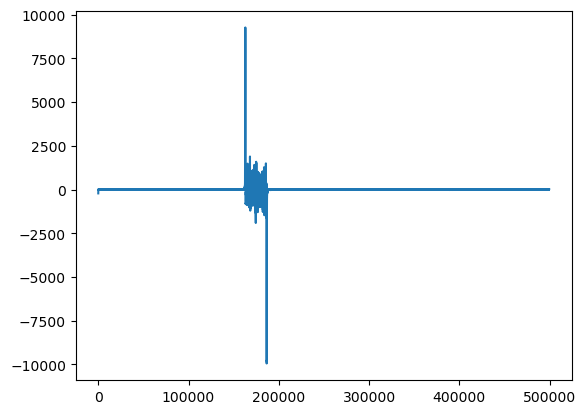

In [7]:
plt.plot(slope_magnitude, label='Slope')
# plt.legend(loc='upper right')
# plt.show()

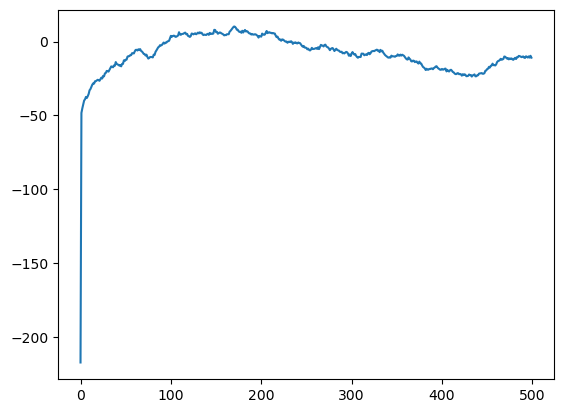

In [8]:
slope_magnitude = slope_magnitude[:len(time_steps)]
plt.plot(time_steps, slope_magnitude)

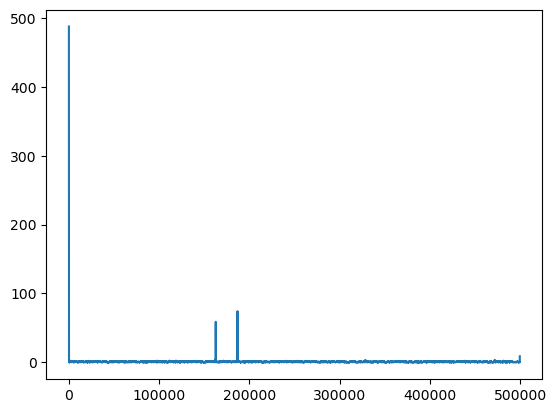

In [9]:
plt.plot(kurtosis_magnitude, label='Kurtosis')


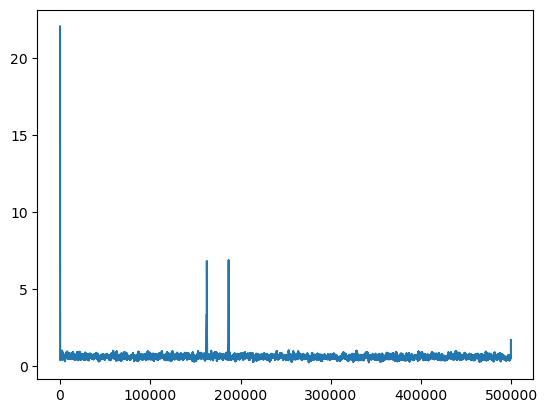

In [10]:
plt.plot(skewness_magnitude, label='Skewness')


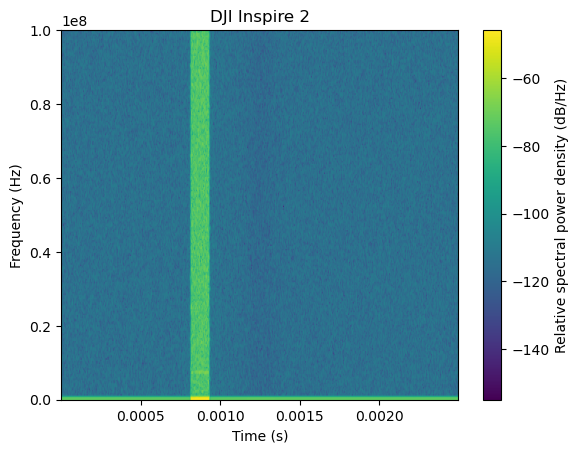

In [11]:
plt.figure()
plt.specgram(iq_data_norm1,NFFT=512,Fs=fs,window=np.blackman(512),vmin=-155)
cbar = plt.colorbar()
cbar.set_label('Relative spectral power density (dB/Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('DJI Inspire 2')
plt.show()

In [28]:
import scipy.signal

# window_size = 100000
# window_overlap = int(window_size / 2)  
noverlap = window_size // 2
threshold = 0.0000000000099
frequencies1, times1, Sxx1 = scipy.signal.spectrogram(iq_data_norm1, fs=fs, window='hann', nperseg=window_size, noverlap=noverlap)
peak_indices1, _ = scipy.signal.find_peaks(Sxx1[50, :], height=threshold)
valid_peak_indices1 = [index for index in peak_indices1 if index < len(frequencies1)]
sequence1 = frequencies1[valid_peak_indices1]
print (sequence1)


[ 3600000.          4400000.          7600000.         10000000.
 11200000.         13600000.         14400000.         15600000.
 16800000.         18000000.         20400000.         21200000.
 22400000.         24000000.         26400000.         29600000.
 33200000.         34399999.99999999 35599999.99999999 39599999.99999999
 41999999.99999999 43999999.99999999 45199999.99999999 46399999.99999999
 50399999.99999999 52399999.99999999 53599999.99999999 54799999.99999999
 57199999.99999999 59199999.99999999 59999999.99999999 60799999.99999999
 64399999.99999999 65599999.99999999 67999999.99999999 71199999.99999999
 77199999.99999999 79599999.99999999 81199999.99999999 82399999.99999999
 85199999.99999999 86799999.99999999 88799999.99999999 90399999.99999999
 91999999.99999999 96399999.99999999 99199999.99999999 99999999.99999999]


In [29]:
frequencies2, times2, Sxx2 = scipy.signal.spectrogram(iq_data_norm2, fs=fs, window='hann', nperseg=window_size, noverlap=noverlap)
peak_indices2, _ = scipy.signal.find_peaks(Sxx2[50, :], height=threshold)
valid_peak_indices2 = [index for index in peak_indices2 if index < len(frequencies2)]
sequence2 = frequencies2[valid_peak_indices2]
print (sequence2)

[ 8400000.          9200000.         10800000.         19200000.
 23600000.         24400000.         34399999.99999999 49199999.99999999
 49999999.99999999 54799999.99999999 55999999.99999999 61199999.99999999
 68799999.99999999 69599999.99999999 73999999.99999999 74799999.99999999
 76799999.99999999 79199999.99999999 79999999.99999999 81999999.99999999
 82799999.99999999 87599999.99999999 90399999.99999999]


In [30]:
frequencies3, times3, Sxx3 = scipy.signal.spectrogram(iq_data_norm3, fs=fs, window='hann', nperseg=window_size, noverlap=noverlap)
peak_indices3, _ = scipy.signal.find_peaks(Sxx3[50, :], height=threshold)
valid_peak_indices3 = [index for index in peak_indices3 if index < len(frequencies3)]
sequence3 = frequencies3[valid_peak_indices3]
print (sequence3)

[  800000.          3200000.         10400000.         34399999.99999999
 38799999.99999999 65599999.99999999 67199999.99999999 79599999.99999999
 81999999.99999999 84799999.99999999 96799999.99999999]


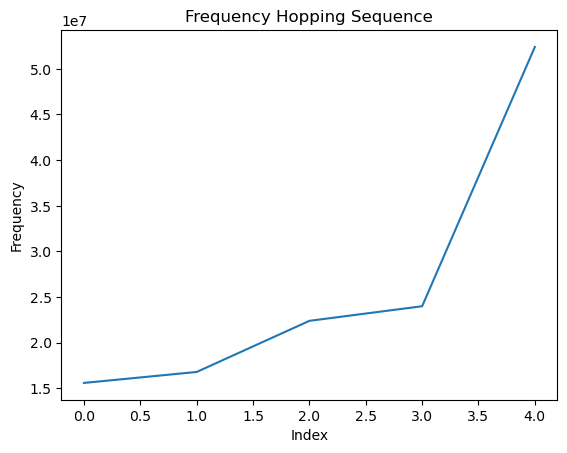

In [28]:
plt.plot(sequence)
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.title('Frequency Hopping Sequence')
plt.show()

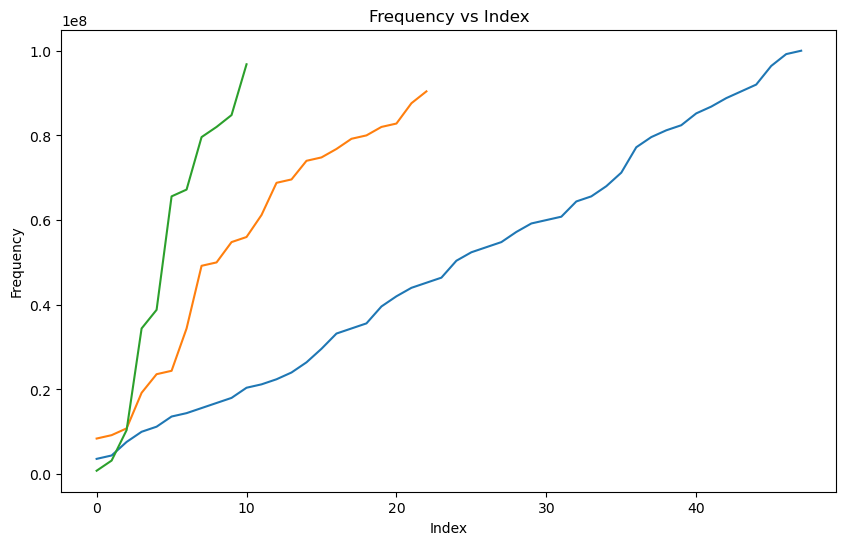

In [32]:
plt.figure(figsize=(10,6))
plt.plot(sequence1)
plt.plot(sequence2)
plt.plot(sequence3)

plt.xlabel('Index')
plt.ylabel('Frequency')
plt.title('Frequency vs Index')
plt.show()